In [3]:
import os

In [4]:
%pwd

'e:\\project\\Wine_quality_prediction\\research'

In [5]:
os.chdir("../")

In [6]:
%pwd

'e:\\project\\Wine_quality_prediction'

In [7]:
import pandas as pd

In [8]:
DATA_PATH = "data\WineQuality.csv"
wines = pd.read_csv(DATA_PATH)

In [9]:
wines.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5


In [10]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 3.2 MB


In [11]:
wines.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,3251.548376,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698
std,1873.780954,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1627.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,4875.000000,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
wines.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

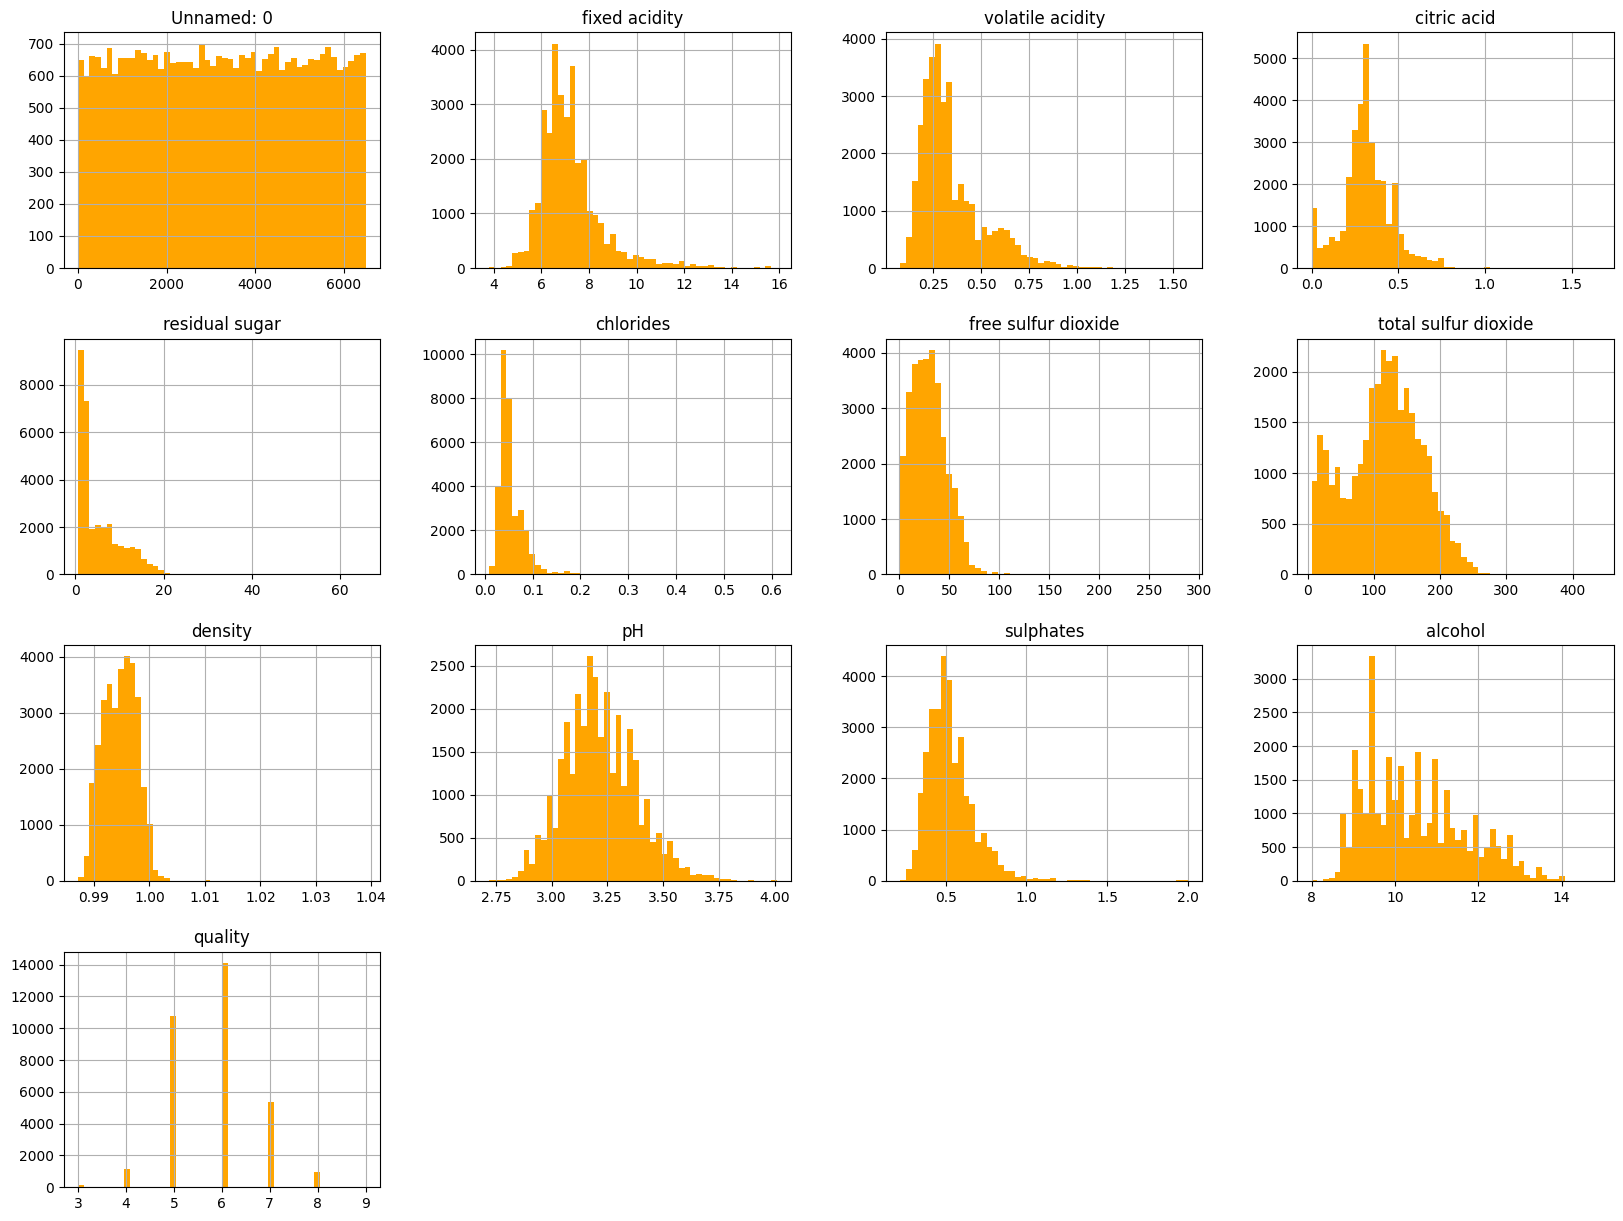

In [13]:
import matplotlib.pyplot as plt

wines.hist(bins=50, figsize=(20,15), color="orange")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = wines.drop(["quality"], axis=1)
y = wines["quality"]

In [16]:
X.head(2)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2732,7.4,0.17,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4
1,2607,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7


In [17]:
y

0        6
1        6
2        6
3        6
4        5
        ..
32480    6
32481    5
32482    6
32483    7
32484    4
Name: quality, Length: 32485, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25988, 12)
(6497, 12)
(25988,)
(6497,)


In [20]:
from sklearn.linear_model import ElasticNet

In [21]:
lr = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
lr.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [23]:
def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        return rmse, mae, r2

In [24]:
predicted_qualities = lr.predict(X_test)
(rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

In [25]:
print("rmse = ", rmse)
print("mae = ", mae)
print("r2 = ", r2)

rmse =  0.7658971580449805
mae =  0.6066050585760346
r2 =  0.22323730037580114
